# Import library

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data

1. __Download Data__

In [142]:

import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/" 
dataset="car.data"
attributes="car.names"
# get data
response = requests.get(url+dataset,allow_redirects=True)
with open(dataset,'wb') as dataset_writer:
    dataset_writer.write(response.content)
raw_dataset = pd.read_csv(dataset,sep=";")
# get attributes
response = requests.get(url+attributes,allow_redirects=True)
with open(attributes,'wb') as attrset_writer:
    attrset_writer.write(response.content)


2.__look at data__

In [143]:
df = pd.read_csv(dataset)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


3.__find column names__

In [144]:
SEARCH_TEXT='7. Attribute Values:'
END_TEXT="8. Missing Attribute Values: none"
with open(attributes,'r') as names:
    content = names.read().splitlines()
    for item in content[content.index(SEARCH_TEXT):content.index(END_TEXT)]:
        print(item)

7. Attribute Values:

   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high



In [145]:
columns_list=['buying_price','maintainance_cost','no_of_doors','persons_capacity','luggage_boot','safety','class']
df.columns = columns_list

 4 __check data types__

In [146]:
df.dtypes

buying_price         object
maintainance_cost    object
no_of_doors          object
persons_capacity     object
luggage_boot         object
safety               object
class                object
dtype: object

In [147]:
df['no_of_doors']=['5' if x == '5more' else x for x in df['no_of_doors']  ]
df['no_of_doors']=df.no_of_doors.astype(int)
df['persons_capacity']=['6' if x == 'more' else x for x in df['persons_capacity']  ]
df['persons_capacity']=df.no_of_doors.astype(int)
df.dtypes

buying_price         object
maintainance_cost    object
no_of_doors           int64
persons_capacity      int64
luggage_boot         object
safety               object
class                object
dtype: object

In [148]:
num_data_buying_price, meta_data_buying_price = pd.factorize(df['buying_price'])
num_data_maintainance_cost, meta_data_maintainance_cost = pd.factorize(df['maintainance_cost'])
num_data_luggage_boot, meta_data_luggage_boot = pd.factorize(df['luggage_boot'])
num_data_safety, meta_data_safety = pd.factorize(df['safety'])
num_data_class, meta_class = pd.factorize(df['class'])
df['buying_price'] = num_data_buying_price
df['maintainance_cost'] = num_data_maintainance_cost
df['luggage_boot'] = num_data_luggage_boot
df['safety'] = num_data_safety
df['class'] = num_data_class

In [149]:
df.dtypes

buying_price         int64
maintainance_cost    int64
no_of_doors          int64
persons_capacity     int64
luggage_boot         int64
safety               int64
class                int64
dtype: object

5. __see statictical info of data__

In [150]:

df.describe()

,buying_price,maintainance_cost,no_of_doors,persons_capacity,luggage_boot,safety,class
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,1.500869,1.500869,3.500869,3.500869,1.000579,0.999421,0.417487
std,1.118098,1.118098,1.118098,1.118098,0.816615,0.816615,0.747337
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,4.000000,4.000000,1.000000,1.000000,0.000000
75%,2.500000,2.500000,4.500000,4.500000,2.000000,2.000000,1.000000
max,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000,3.000000


# Exploratory analysis

1 __fill blank values__

In [151]:
df.fillna(df.mean())

,buying_price,maintainance_cost,no_of_doors,persons_capacity,luggage_boot,safety,class
0,0,0,2,2,0,0,0
1,0,0,2,2,0,1,0
2,0,0,2,2,1,2,0
3,0,0,2,2,1,0,0
4,0,0,2,2,1,1,0
...,...,...,...,...,...,...,...
1722,3,3,5,5,1,0,3
1723,3,3,5,5,1,1,2
1724,3,3,5,5,2,2,0
1725,3,3,5,5,2,0,3


2. __drop duplicate values__

In [152]:
df = df.drop_duplicates(keep='first')
df

,buying_price,maintainance_cost,no_of_doors,persons_capacity,luggage_boot,safety,class
0,0,0,2,2,0,0,0
1,0,0,2,2,0,1,0
2,0,0,2,2,1,2,0
3,0,0,2,2,1,0,0
4,0,0,2,2,1,1,0
...,...,...,...,...,...,...,...
1711,3,3,5,5,0,1,3
1713,3,3,5,5,1,0,3
1714,3,3,5,5,1,1,2
1716,3,3,5,5,2,0,3


3. __Plot correlation plot using heat map on Initial Data__

<AxesSubplot:>

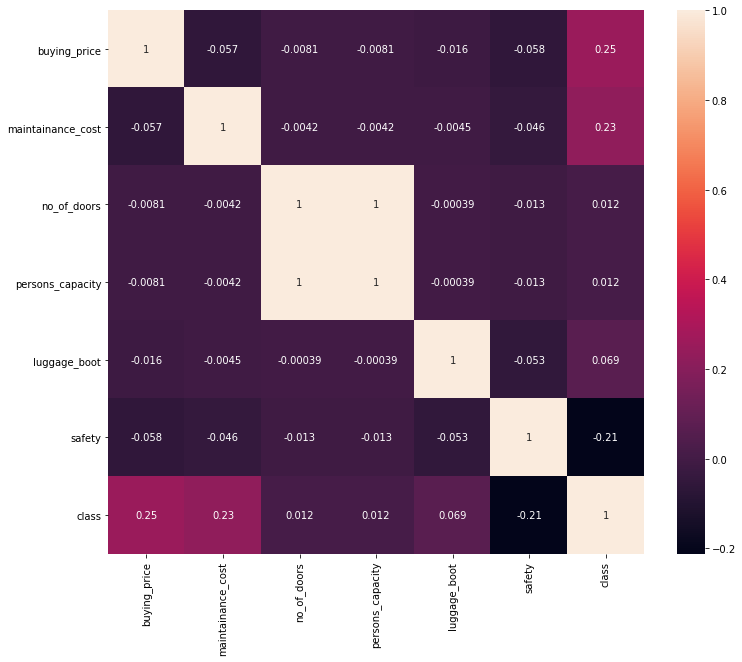

In [153]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

4.__check correlation and remove highly correlated__

In [154]:
def calcDrop(res):
    # All variables with correlation > cutoff
    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    
    # All unique variables in drop column
    poss_drop = list(set(res['drop'].tolist()))

    # Keep any variable not in drop column
    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    # Drop any variables in same row as a keep variable
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    # Remove drop variables from possible drop 
    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    # subset res dataframe to include possible drop pairs
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    # remove rows that are decided (drop), take set and add to drops
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop

def corrX_new(df, cut) :
       
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))
    
    dropcols = list()
    
    res = pd.DataFrame(columns=(['v1', 'v2', 'v1.target', 
                                 'v2.target','corr', 'drop' ]))
    
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([ corr_mtx.index[row],
                up.columns[col],
                avg_corr[row],
                avg_corr[col],
                up.iloc[row,col],
                drop],
                index = res.columns)
        
                res = res.append(s, ignore_index = True)
    
    dropcols_names = calcDrop(res)
    
    return(dropcols_names)


drop = corrX_new(df, cut = 0.70)

for x in drop:
    df.drop([x], axis=1, inplace=True)

<AxesSubplot:>

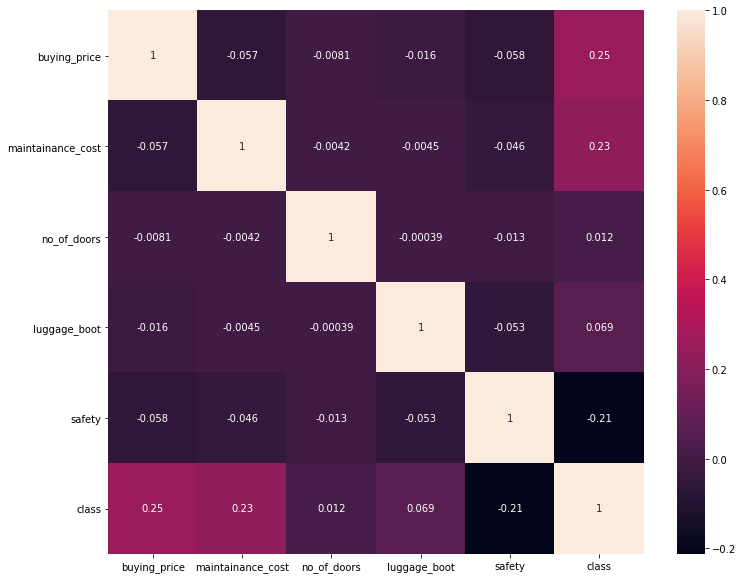

In [155]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

# train and test split data

In [156]:
X = df[['buying_price', 'maintainance_cost', 'no_of_doors', 'luggage_boot',
       'safety']]
Y = df['class']

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

create model and apply

In [158]:
from sklearn.ensemble import RandomForestClassifier 

In [159]:
randomforest = RandomForestClassifier(n_estimators=200)

In [160]:
randomforest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [161]:
predictions = randomforest.predict(X_test)

check classification report

In [162]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[70 28  8  4]
 [37  2  0  0]
 [ 7  0  0  0]
 [15  0  1  0]]
              precision    recall  f1-score   support

           0       0.54      0.64      0.59       110
           1       0.07      0.05      0.06        39
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        16

    accuracy                           0.42       172
   macro avg       0.15      0.17      0.16       172
weighted avg       0.36      0.42      0.39       172

